In [1]:
import numpy as np
import matplotlib.pyplot as plt
import parse_runs
import pandas as pd
import json

In [2]:
with open('data/static_shapes_techniques.json') as f:
    data = json.load(f)
    
df = pd.json_normalize(data).dropna()
df.columns = df.columns.str.replace('parameters.','', regex=False)
df.columns = df.columns.str.replace('planner.','', regex=False)
df.columns = df.columns.str.replace('result.','', regex=False)
df.columns = df.columns.str.replace('problem.','', regex=False)
df['strategy'] = df['strategy'].str.replace('shell_path_length','Shell').replace('gtg_path_length','GSG')
df['shell'] = df['shell'].str.replace('Cutting Plane','CP')
df = df[df['shell'] != 'Cylinder']

In [3]:
n_counts = pd.unique(df['nApples'])
scenes = pd.unique(df['scene'])

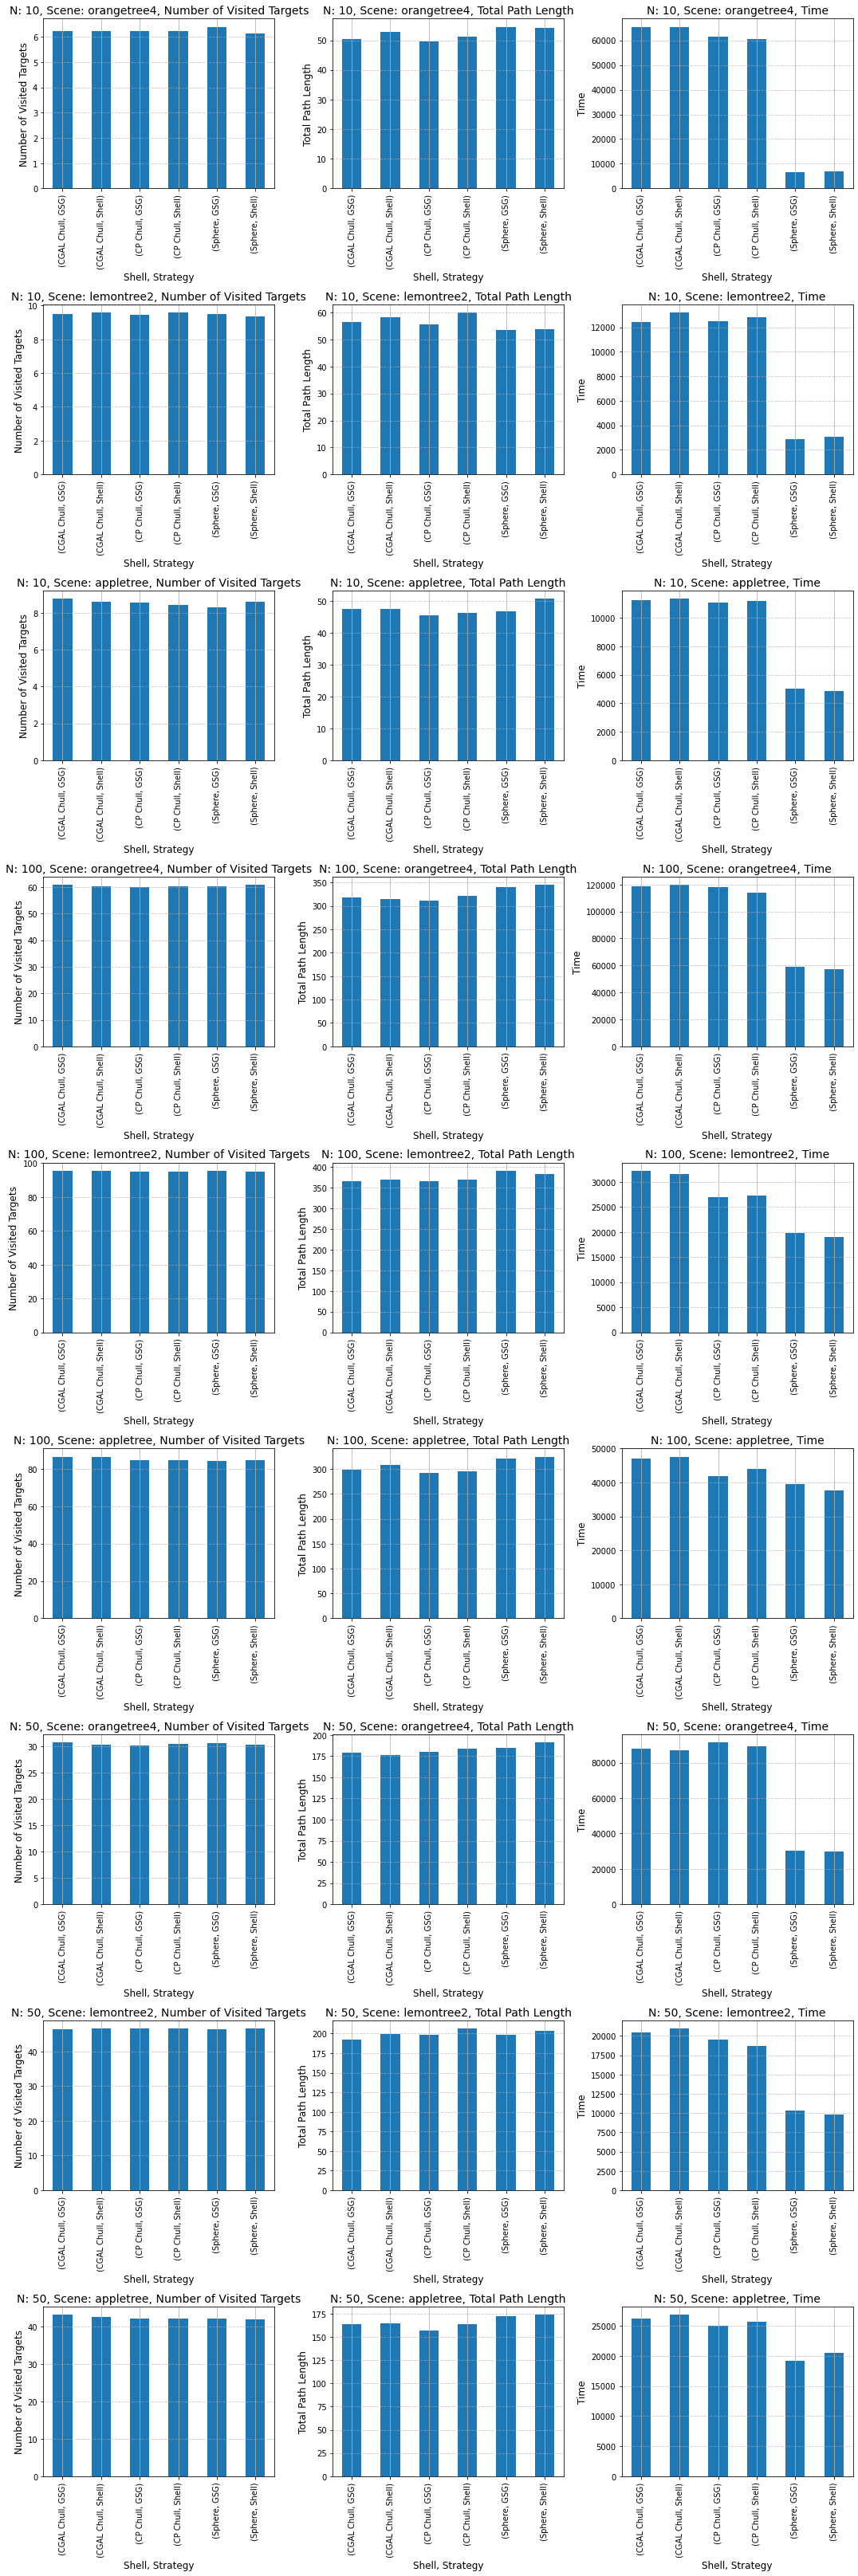

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've loaded the data into a DataFrame called 'df'

# Get unique values for nApples and scene
nApples_values = df['nApples'].unique()
scene_values = df['scene'].unique()

# Calculate the number of rows and columns for subplots
n_rows = len(nApples_values) * len(scene_values)
n_cols = len(['n_visited', 'total_path_length', 'time'])

# Define a dictionary to map metric names to human-readable labels
metric_labels = {
    'n_visited': 'Number of Visited Targets',
    'total_path_length': 'Total Path Length',
    'time': 'Time'
}

# Create a single figure with subplots for each metric and nApples/scene combination
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

for i, (n, scene) in enumerate([(n, s) for n in nApples_values for s in scene_values]):
    # Filter the data based on nApples and scene
    filtered_data = df[(df['nApples'] == n) & (df['scene'] == scene)]

    for j, col in enumerate(['n_visited', 'total_path_length', 'time']):
        # Group the data by shell and strategy and calculate the mean
        mean_data = filtered_data.groupby(['shell', 'strategy']).mean()[col]

        # Plot a bar chart for the current combination of nApples, scene, and metric
        ax = axes[i, j]
        mean_data.plot.bar(ax=ax, grid=True)
        
        # Format the title, xlabel, and ylabel
        ax.set_title(f'N: {n}, Scene: {scene}, {metric_labels[col]}', fontsize=14)
        ax.set_xlabel('Shell, Strategy', fontsize=12)
        ax.set_ylabel(metric_labels[col], fontsize=12)

        # Customize the appearance of the grid
        ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()
